In [2]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft

In [28]:
#验证测试代码
labeled_data = pd.read_csv("../tactileGestureDetection-main/DATA/Labeled_data/0724-7ST-Y1/labeled_data.csv")

# labeled_data.columns.tolist()
label_0_data = labeled_data[labeled_data['label'] == 1]
print(label_0_data.head())
# label_counts = labeled_data['label'].value_counts()
# print(label_counts)

     index      time    tau_J0     tau_J1    tau_J2     tau_J3    tau_J4  \
402    403  4.020026 -0.037866 -17.145193 -1.966746  17.847666  0.410484   
403    404  4.030046 -0.073572 -17.220572 -1.966746  17.883371  0.153221   
404    405  4.040145  1.981482 -16.764334  0.012929  21.779245 -0.057351   
405    406  4.050138  4.639563 -17.831533  2.587697  23.612131 -0.451943   
406    407  4.060060  5.012488 -19.168509  2.778127  22.338633 -0.342080   

       tau_J5    tau_J6  tau_J_d0  ...       de5       de6   etau_J0  \
402  2.478222 -0.069713       0.0  ... -0.000275  0.000571  0.037866   
403  1.995739  0.031910       0.0  ... -0.017889  0.003703  0.073572   
404  1.712841 -0.008373       0.0  ... -0.041174  0.000043 -1.981482   
405  2.426037 -0.120983       0.0  ... -0.014429  0.001946 -4.639563   
406  2.897533 -0.028515       0.0  ...  0.005907  0.001971 -5.012488   

       etau_J1   etau_J2    etau_J3   etau_J4   etau_J5   etau_J6  label  
402  17.145193  1.966746 -17.847666

In [3]:
#验证 数据块分类是否正确代码
labeled_data = pd.read_csv("../tactileGestureDetection-main/DATA/tactile_dataset.csv")
# labeled_data
# labeled_data.columns.tolist()
# # label_0_data = labeled_data[labeled_data['label'] == 1]
# # print(label_0_data.head())

# # 只筛选出 touch_type 为 'ST' 的数据
st_data = labeled_data[labeled_data['touch_type'] == 'ST']
st_data
# # 计算每个 (block_id, touch_type) 组合的出现次数
# st_label_counts = st_data.groupby(['block_id', 'touch_type']).size()

# # 计算每个 (block_id, touch_type) 组合的出现次数
# # label_counts = labeled_data.groupby(['block_id', 'touch_type']).size()

# # 打印出现次数
# print(st_label_counts)

,index,time,tau_J0,tau_J1,tau_J2,tau_J3,tau_J4,tau_J5,tau_J6,tau_J_d0,...,etau_J0,etau_J1,etau_J2,etau_J3,etau_J4,etau_J5,etau_J6,label,touch_type,block_id
0,403,4.020026,-0.037866,-17.145193,-1.966746,17.847666,0.410484,2.478222,-0.069713,0.0,...,0.037866,17.145193,1.966746,-17.847666,-0.410484,-2.478222,0.069713,1,ST,0
1,404,4.030046,-0.073572,-17.220572,-1.966746,17.883371,0.153221,1.995739,0.031910,0.0,...,0.073572,17.220572,1.966746,-17.883371,-0.153221,-1.995739,-0.031910,1,ST,0
2,405,4.040145,1.981482,-16.764334,0.012929,21.779245,-0.057351,1.712841,-0.008373,0.0,...,-1.981482,16.764334,-0.012929,-21.779245,0.057351,-1.712841,0.008373,1,ST,0
3,406,4.050138,4.639563,-17.831533,2.587697,23.612131,-0.451943,2.426037,-0.120983,0.0,...,-4.639563,17.831533,-2.587697,-23.612131,0.451943,-2.426037,0.120983,1,ST,0
4,407,4.060060,5.012488,-19.168509,2.778127,22.338633,-0.342080,2.897533,-0.028515,0.0,...,-5.012488,19.168509,-2.778127,-22.338633,0.342080,-2.897533,0.028515,1,ST,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,20246,202.450002,-0.073572,-17.184866,-2.006419,17.847666,0.437950,2.478222,-0.109997,0.0,...,0.073572,17.184866,2.006419,-17.847666,-0.437950,-2.478222,0.109997,1,ST,124
1546,20247,202.460012,-0.073572,-17.184866,-2.006419,17.847666,0.437950,2.478222,-0.109997,0.0,...,0.073572,17.184866,2.006419,-17.847666,-0.437950,-2.478222,0.109997,1,ST,124
1547,20248,202.469999,-0.073572,-17.184866,-2.006419,17.847666,0.437950,2.478222,-0.109997,0.0,...,0.073572,17.184866,2.006419,-17.847666,-0.437950,-2.478222,0.109997,1,ST,124
1548,20249,202.479996,-0.073572,-17.184866,-2.006419,17.847666,0.437950,2.478222,-0.109997,0.0,...,0.073572,17.184866,2.006419,-17.847666,-0.437950,-2.478222,0.109997,1,ST,124


In [31]:
#切割数据，每个打上对应的tactile type
import os
import pandas as pd

global_block_id = 0

def process_labeledDta(file_path, tactile_type):
    """处理单个labeled_data.csv文件，将连续label为1的数据块标记为指定触碰类型"""
    global global_block_id
    df = pd.read_csv(file_path)
    # print(f"现在读的数据来自 {file_path}")
    labeled_blocks = []

    in_block = False
    block_start = 0
    
    
    for i in range(len(df)):
        if df.iloc[i, df.columns.get_loc('label')] == 1 and not in_block:
            in_block = True
            block_start = i
        elif df.iloc[i, df.columns.get_loc('label')] == 0 and in_block:
            in_block = False
            block = df.iloc[block_start:i].copy()
            block['touch_type'] = tactile_type
            block['block_id'] = global_block_id  # 添加全局唯一数据块标识符
            labeled_blocks.append(block)
            global_block_id += 1  # 增加全局唯一数据块标识符


    if in_block:
        block = df.iloc[block_start:].copy()
        block['touch_type'] = tactile_type
        block['block_id'] = global_block_id  # 添加全局唯一数据块标识符
        labeled_blocks.append(block)
        global_block_id += 1  # 增加全局唯一数据块标识符


    return labeled_blocks

def creat_tactile_dataset(data_folder):
    """遍历数据文件夹，处理符合条件的数据，并将结果保存在列表中"""
    tactile_dataset = []
   
    for folder in os.listdir(data_folder):
        # print(f"folder is {folder}")
        folder_path = os.path.join(data_folder, folder)
        if os.path.isdir(folder_path):  # Check if it's a directory
            for file in os.listdir(folder_path):
                if file == 'labeled_data.csv':
                    tactile_type = folder.split('-')[1][1:]
                    # print(f"当前的触碰类型是 {tactile_type}")

                    if tactile_type in ['ST', 'G', 'P']:
                        file_path = os.path.join(folder_path, file)
                        blocks = process_labeledDta(file_path, tactile_type)
                        tactile_dataset.extend(blocks)
    
    return tactile_dataset

# 保存结果
def save_tactile_dataset(dataset, output_file):
    """将处理后的数据集保存为CSV文件，若文件存在则删除并重建"""
    if os.path.exists(output_file):
        os.remove(output_file)  # 删除已有文件
    
    # 合并所有数据块
    combined_df = pd.concat(dataset, ignore_index=True)
    combined_df.to_csv(output_file, index=False)
    print(f"tactile_dataset 已保存到 {output_file}")

data_folder = '../tactileGestureDetection-main/DATA/Labeled_data'
tactile_dataset = creat_tactile_dataset(data_folder)

# 指定输出文件名
output_file = '../tactileGestureDetection-main/DATA/tactile_dataset.csv'
save_tactile_dataset(tactile_dataset, output_file)


tactile_dataset 已保存到 ../tactileGestureDetection-main/DATA/tactile_dataset.csv


In [1]:
#以上程序的单个数据集测试代码
import os
import pandas as pd

global_block_id = 0

def process_labeledDta(file_path, tactile_type):
    """处理单个labeled_data.csv文件，将连续label为1的数据块标记为指定触碰类型"""
    global global_block_id
    df = pd.read_csv(file_path)
    # print(f"现在读的数据来自 {file_path}")
    labeled_blocks = []

    in_block = False
    block_start = 0
    block_info = []
    zero_counts = []

    for i in range(len(df)):
        if df.iloc[i, df.columns.get_loc('label')] == 1 and not in_block:
            in_block = True
            block_start = i
        elif df.iloc[i, df.columns.get_loc('label')] == 0 and in_block:
            in_block = False
            block = df.iloc[block_start:i].copy()
            block['touch_type'] = tactile_type
            block['block_id'] = global_block_id  # 添加全局唯一数据块标识符
            labeled_blocks.append(block)
            block_info.append((global_block_id, block_start, i - 1))  # 记录块的ID、开始行和结束行
            global_block_id += 1  # 增加全局唯一数据块标识符

    if in_block:
        block = df.iloc[block_start:].copy()
        block['touch_type'] = tactile_type
        block['block_id'] = global_block_id  # 添加全局唯一数据块标识符
        labeled_blocks.append(block)
        block_info.append((global_block_id, block_start, len(df) - 1))  # 记录块的ID、开始行和结束行
        global_block_id += 1  # 增加全局唯一数据块标识符

        # 计算偶数数据块和相邻奇数数据块之间0的个数
    for i in range(0, len(block_info) - 1, 2):
        end_of_even_block = block_info[i][2]
        start_of_odd_block = block_info[i + 1][1]
        zero_count = (df.iloc[end_of_even_block + 1:start_of_odd_block]['label'] == 0).sum()
        zero_counts.append((block_info[i][0], block_info[i + 1][0], zero_count))
    
    return labeled_blocks, block_info, zero_counts

def process_single_folder(data_folder, folder_name):
    """处理指定文件夹下的labeled_data.csv，统计数据块个数，并打印块的开始行和结束行"""
    folder_path = os.path.join(data_folder, folder_name)
    
    if os.path.isdir(folder_path):  # Check if it's a directory
        file_path = os.path.join(folder_path, 'labeled_data.csv')
        
        if os.path.isfile(file_path):
            tactile_type = folder_name.split('-')[1][1:]
            
            if tactile_type in ['DT']:
                blocks, block_info,zero_counts = process_labeledDta(file_path, tactile_type)
                
                # 打印数据块的个数
                block_count = len(blocks)
                print(f"文件夹 {folder_name} 中的数据块个数为: {block_count}")
                
                # 打印数据块的开始行和结束行
                # for block_id, start_row, end_row in block_info:
                    # print(f"数据块 {block_id} 从行 {start_row} 到行 {end_row}")

                # 打印偶数数据块和相邻奇数数据块之间0的个数
                for even_block_id, odd_block_id, zero_count in zero_counts:
                    print(f"数据块 {even_block_id} 和数据块 {odd_block_id} 之间有 {zero_count} 个0")
        else:
            print(f"文件夹 {folder_name} 下没有找到labeled_data.csv文件")
    else:
        print(f"{folder_name} 不是有效的文件夹")

# 指定文件夹
data_folder = '../tactileGestureDetection-main/DATA/Labeled_data'
folder_name = '0724-7DT-Y1'  # 替换为要处理的文件夹名称
process_single_folder(data_folder, folder_name)



文件夹 0724-7DT-Y1 中的数据块个数为: 120
数据块 0 和数据块 1 之间有 23 个0
数据块 2 和数据块 3 之间有 23 个0
数据块 4 和数据块 5 之间有 24 个0
数据块 6 和数据块 7 之间有 28 个0
数据块 8 和数据块 9 之间有 28 个0
数据块 10 和数据块 11 之间有 23 个0
数据块 12 和数据块 13 之间有 27 个0
数据块 14 和数据块 15 之间有 25 个0
数据块 16 和数据块 17 之间有 33 个0
数据块 18 和数据块 19 之间有 24 个0
数据块 20 和数据块 21 之间有 27 个0
数据块 22 和数据块 23 之间有 23 个0
数据块 24 和数据块 25 之间有 23 个0
数据块 26 和数据块 27 之间有 21 个0
数据块 28 和数据块 29 之间有 28 个0
数据块 30 和数据块 31 之间有 27 个0
数据块 32 和数据块 33 之间有 29 个0
数据块 34 和数据块 35 之间有 26 个0
数据块 36 和数据块 37 之间有 29 个0
数据块 38 和数据块 39 之间有 23 个0
数据块 40 和数据块 41 之间有 23 个0
数据块 42 和数据块 43 之间有 24 个0
数据块 44 和数据块 45 之间有 22 个0
数据块 46 和数据块 47 之间有 22 个0
数据块 48 和数据块 49 之间有 23 个0
数据块 50 和数据块 51 之间有 25 个0
数据块 52 和数据块 53 之间有 21 个0
数据块 54 和数据块 55 之间有 25 个0
数据块 56 和数据块 57 之间有 27 个0
数据块 58 和数据块 59 之间有 20 个0
数据块 60 和数据块 61 之间有 24 个0
数据块 62 和数据块 63 之间有 24 个0
数据块 64 和数据块 65 之间有 25 个0
数据块 66 和数据块 67 之间有 25 个0
数据块 68 和数据块 69 之间有 26 个0
数据块 70 和数据块 71 之间有 28 个0
数据块 72 和数据块 73 之间有 29 个0
数据块 74 和数据块 75 之间有 24 个0
数据块 76 和数据块 77 之间有 25 个0
数据块 7

In [26]:
# 测试验证代码
import pandas as pd

# 读取CSV文件
file_path = '/Users/shangyu/Documents/GitHub/contactInterpretation-main/tactileGestureDetection-main/DATA/Labeled_data/0724-7DT-S1/labeled_data.csv'
df = pd.read_csv(file_path)

# 指定要显示的行范围
start_row = 408 # 起始行（包含）
end_row = 438  # 结束行（包含）

# 显示从start_row到end_row的行
print(df.iloc[start_row:end_row + 1])

     index      time    tau_J0     tau_J1  ...   etau_J4   etau_J5   etau_J6  label
408    409  4.080007  1.195960 -17.716482  ... -0.116599 -2.310680  0.049572      1
409    410  4.089997  1.457800 -17.910879  ... -0.070823 -2.132153  0.059643      1
410    411  4.100002  1.235632 -17.795828  ... -0.107444 -2.383923  0.109997      0
411    412  4.110000  0.561194 -17.335623  ... -0.253929 -2.551464  0.120983      0
412    413  4.119995  0.299353 -16.994436  ... -0.364707 -2.562450  0.049572      0
413    414  4.129995  0.188269 -16.458853  ... -0.392173 -2.541393  0.109997      0
414    415  4.139994  0.188269 -16.458853  ... -0.392173 -2.541393  0.109997      0
415    416  4.149992 -0.375085 -16.343801  ... -0.392173 -2.761120  0.099926      0
416    417  4.159991 -1.085229 -16.494558  ... -0.392173 -2.614635  0.099926      0
417    418  4.169995 -1.386743 -16.879385  ... -0.428794 -2.310680  0.028515      0
418    419  4.179997 -1.196313 -17.716482  ... -0.428794 -2.258495  0.099926

In [83]:
# time-frequency analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft

file_path = '/Users/shangyu/Documents/GitHub/contactInterpretation-main/tactileGestureDetection-main/DATA/tactile_dataset.csv'
data = pd.read_csv(file_path)

output_dir = '/Users/shangyu/Documents/GitHub/contactInterpretation-main/tactileGestureDetection-main/DATA/STFT_images/'

# 创建保存图像的目录
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

data = pd.read_csv(file_path)

# 排除不感兴趣的列
columns_of_interest = [col for col in data.columns if col not in ['index', 'time', 'label', 'touch_type', 'block_id']]

# 提取采样率
time_data = data['time'].values
fs = 1 / np.mean(np.diff(time_data))  # 计算采样率

# 创建一个列表，用于记录图像文件名和对应的block_id和touch_type
image_records = []

# 分块绘制
block_ids = data['block_id'].unique()

for block_id in block_ids:
    block_data = data[data['block_id'] == block_id]
    touch_type = block_data['touch_type'].iloc[0]
    
    # 创建一个图形和一个子图
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.set_title(f'Block ID: {block_id}, Touch_type: {touch_type}')
    
    for col in columns_of_interest:
        signal = block_data[col].values
        
        # 计算STFT
        nperseg = min(256, len(signal))  # 确保窗口长度不超过信号长度
        noverlap = nperseg // 2
        f, t, Zxx = stft(signal, fs, nperseg=nperseg, noverlap=noverlap)
        
        # 绘制时频谱图
        cax = ax.pcolormesh(t, f, np.abs(Zxx), shading='gouraud', alpha=0.7)
    
    # 添加图例和标签
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.colorbar(cax, ax=ax, label='Magnitude')
    
    # 保存图像
    image_filename = f'block_{block_id}_touch_{touch_type}.png'
    image_path = os.path.join(output_dir, image_filename)
    plt.savefig(image_path)
    plt.close(fig)
    
    # 记录图像文件名和对应的block_id和touch_type
    image_records.append({'image_filename': image_filename, 'block_id': block_id, 'touch_type': touch_type})

# 保存记录为CSV文件
records_df = pd.DataFrame(image_records)
records_df.to_csv(os.path.join(output_dir, 'image_records.csv'), index=False)

print("STFT图像和记录已成功保存。")

STFT图像和记录已成功保存。


{'G': 0, 'P': 1, 'ST': 2}
Epoch 1/20
9/9 [==============================] - 13s 1s/step - loss: 1.1213 - accuracy: 0.3613 - val_loss: 1.0555 - val_accuracy: 0.5932
Epoch 2/20
9/9 [==============================] - 10s 1s/step - loss: 1.0248 - accuracy: 0.4416 - val_loss: 0.8103 - val_accuracy: 0.5847
Epoch 3/20
9/9 [==============================] - 11s 1s/step - loss: 0.8273 - accuracy: 0.6095 - val_loss: 0.6418 - val_accuracy: 0.6525
Epoch 4/20
9/9 [==============================] - 10s 1s/step - loss: 0.7813 - accuracy: 0.6277 - val_loss: 0.5701 - val_accuracy: 0.8814
Epoch 5/20
9/9 [==============================] - 10s 1s/step - loss: 0.6352 - accuracy: 0.7299 - val_loss: 0.5720 - val_accuracy: 0.7458
Epoch 6/20
9/9 [==============================] - 11s 1s/step - loss: 0.6802 - accuracy: 0.7153 - val_loss: 0.4965 - val_accuracy: 0.8305
Epoch 7/20
9/9 [==============================] - 13s 1s/step - loss: 0.6117 - accuracy: 0.7336 - val_loss: 0.5153 - val_accuracy: 0.7966
Epoch 8/

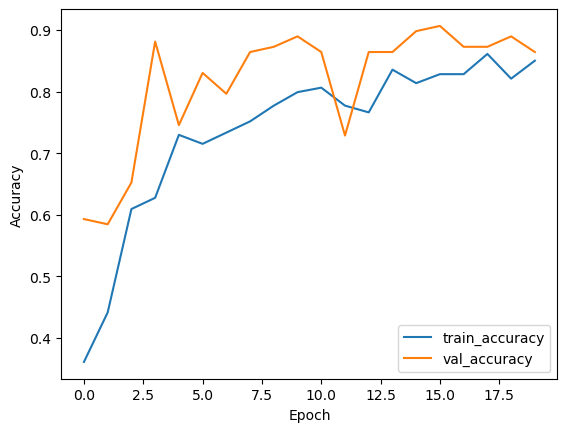

In [15]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import Image

data_path = "/Users/shangyu/Documents/GitHub/contactInterpretation-main/tactileGestureDetection-main/DATA/STFT_images/"
file = data_path + 'image_records.csv'
image_df = pd.read_csv(file)


images = []
labels = []

for index, row in image_df.iterrows():
    # print(f"index is {index}")
    # print(f"row is {row}")
    img_path = os.path.join(data_path,row['image_filename'])
    img = Image.open(img_path).convert('RGB')
    img = img.resize((128,128))
    img = np.array(img)
    images.append(img)
    labels.append(row['touch_type'])

images = np.array(images)
labels = np.array(labels)
# print(images)

label_classes = np.unique(labels)
# print(label_classes)
label_map = {label:idx for idx,label in enumerate(label_classes)}
print(label_map)

labels = np.array([label_map[label] for label in labels])
labels = to_categorical(labels,num_classes= len(label_classes))
# print(labels)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.3, random_state=42)

train_data = ImageDataGenerator(rescale=1./255, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
val_data = ImageDataGenerator(rescale=1./255)

train_generator = train_data.flow(X_train, y_train, batch_size=32)
val_generator = val_data.flow(X_val, y_val, batch_size=32)


# 定义CNN模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_classes), activation='softmax')
])

# 编译模型
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
fitted = model.fit(train_generator, epochs=20, validation_data=val_generator)

# 可视化训练过程
plt.plot(fitted.history['accuracy'], label='train_accuracy')
plt.plot(fitted.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

